In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
df=pd.read_csv("loan.csv")
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [11]:
df.shape

(614, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# Missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

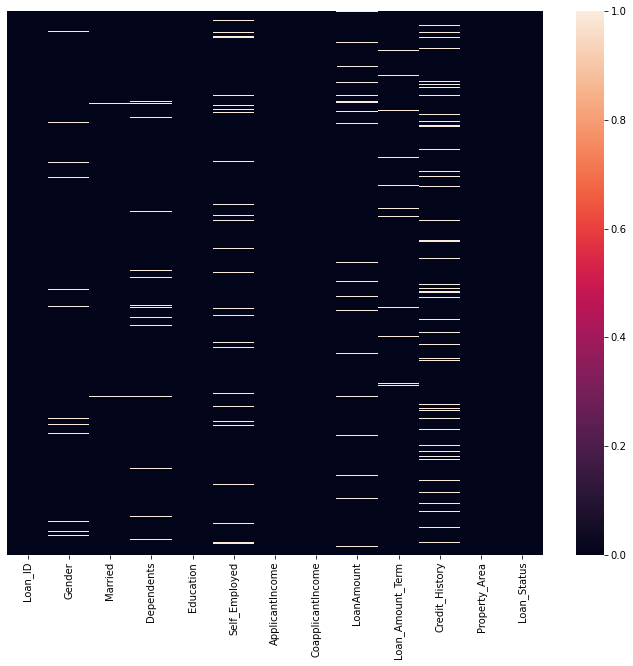

In [14]:
plt.figure(figsize=(12,10))
sb.heatmap(df.isnull(),yticklabels=False)

In [15]:
df=df.dropna()

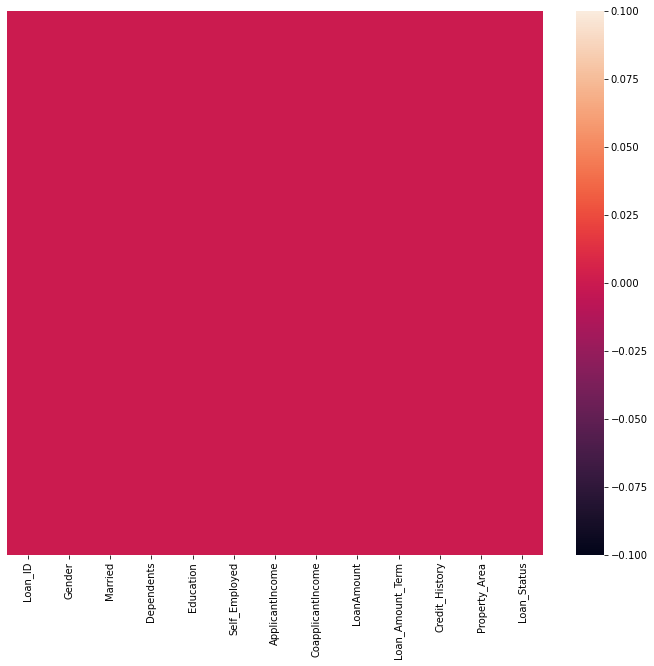

In [16]:
plt.figure(figsize=(12,10))
sb.heatmap(df.isnull(),yticklabels=False)

In [17]:
# Label encoding
df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [36]:
df["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [21]:
df=df.replace(to_replace='3+', value=4)

In [22]:
df["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

#### data visualization

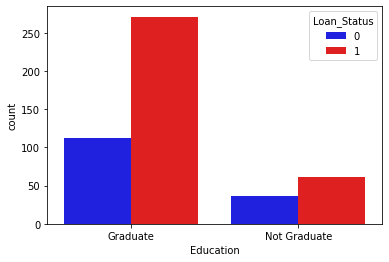

In [34]:
# education & loan status
#sb.countplot(x="Education", hue='Loan_Status', data=df, palette=["#bcbddc", "#efedf5"])
sb.countplot(x="Education", hue='Loan_Status', data=df, palette=["blue", 'red'])

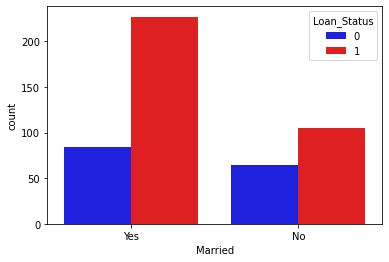

In [35]:
# Marital Status and Loan Status
sb.countplot(x="Married", hue='Loan_Status', data=df, palette=["blue", 'red'])

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
df['Married']=le.fit_transform(df['Married'])
df['Gender']=le.fit_transform(df['Gender'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])

# Without sklearn
df.replace({"Education":{'Graduate':1, 'Not Graduate':0}}, inplace=True)

In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [45]:
# Seperaing data 

X=df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
y=df['Loan_Status']

In [63]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, random_state=2 )

In [64]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(432, 11) (48, 11) (432,) (48,)


In [65]:
from sklearn import svm

In [66]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [67]:
y_pred=classifier.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, classification_report

In [69]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8125


In [72]:
print("Classsification Report: ", classification_report(y_test, y_pred))

Classsification Report:                precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.79      1.00      0.88        33

    accuracy                           0.81        48
   macro avg       0.89      0.70      0.73        48
weighted avg       0.85      0.81      0.78        48

